# Classifier on CIFAR10

## Using 3-Layer MLP

In [1]:
import tensorflow as tf
import numpy as np

from keras.datasets import cifar10
from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, plot_model




Using TensorFlow backend.


In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
input_size = image_size * image_size * 3

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) 
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [3]:
# hyper-parameters
batch_size = 256
n_units = 256
epochs = 3

In [4]:
# model is a 3-layer MLP
model = Sequential(name='3-layer-MLP')
model.add(Dense(n_units, input_dim=input_size, activation='relu', name='input_layer'))
model.add(Dense(n_units, activation='relu', name='hidden_layer'))
model.add(Dense(num_labels, activation='softmax', name='output_layer'))
model.summary()

Model: "3-layer-MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 256)               786688    
_________________________________________________________________
hidden_layer (Dense)         (None, 256)               65792     
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Epoch 1/3


  1/196 [..............................] - ETA: 0s - loss: 2.3669 - accuracy: 0.0820

  5/196 [..............................] - ETA: 2s - loss: 2.3212 - accuracy: 0.1133

  8/196 [>.............................] - ETA: 2s - loss: 2.3052 - accuracy: 0.1250

 12/196 [>.............................] - ETA: 2s - loss: 2.2903 - accuracy: 0.1413

 14/196 [=>............................] - ETA: 3s - loss: 2.2853 - accuracy: 0.1465

 17/196 [=>............................] - ETA: 3s - loss: 2.2800 - accuracy: 0.1494

 20/196 [==>...........................] - ETA: 3s - loss: 2.2712 - accuracy: 0.1588

 23/196 [==>...........................] - ETA: 3s - loss: 2.2665 - accuracy: 0.1620

 26/196 [==>...........................] - ETA: 3s - loss: 2.2619 - accuracy: 0.1668

 28/196 [===>..........................] - ETA: 3s - loss: 2.2584 - accuracy: 0.1687

 31/196 [===>..........................] - ETA: 3s - loss: 2.2518 - accuracy: 0.1752

 34/196 [====>.........................] - ETA: 3s - loss: 2.2482 - accuracy: 0.1785

 37/196 [====>.........................] - ETA: 3s - loss: 2.2426 - accuracy: 0.1838

 40/196 [=====>........................] - ETA: 3s - loss: 2.2383 - accuracy: 0.1851

 43/196 [=====>........................] - ETA: 3s - loss: 2.2360 - accuracy: 0.1860

 46/196 [======>.......................] - ETA: 2s - loss: 2.2319 - accuracy: 0.1902

 49/196 [======>.......................] - ETA: 2s - loss: 2.2288 - accuracy: 0.1918

 52/196 [======>.......................] - ETA: 2s - loss: 2.2244 - accuracy: 0.1959

 56/196 [=======>......................] - ETA: 2s - loss: 2.2185 - accuracy: 0.1994

 59/196 [========>.....................] - ETA: 2s - loss: 2.2157 - accuracy: 0.2013

 60/196 [========>.....................] - ETA: 2s - loss: 2.2138 - accuracy: 0.2028

 62/196 [========>.....................] - ETA: 2s - loss: 2.2111 - accuracy: 0.2047

 65/196 [========>.....................] - ETA: 2s - loss: 2.2067 - accuracy: 0.2063

 68/196 [=========>....................] - ETA: 2s - loss: 2.2034 - accuracy: 0.2086

 71/196 [=========>....................] - ETA: 2s - loss: 2.1998 - accuracy: 0.2106

 74/196 [==========>...................] - ETA: 2s - loss: 2.1968 - accuracy: 0.2125

 78/196 [==========>...................] - ETA: 2s - loss: 2.1917 - accuracy: 0.2150

 81/196 [===========>..................] - ETA: 2s - loss: 2.1884 - accuracy: 0.2158

 85/196 [============>.................] - ETA: 2s - loss: 2.1839 - accuracy: 0.2185

 88/196 [============>.................] - ETA: 2s - loss: 2.1805 - accuracy: 0.2205

 91/196 [============>.................] - ETA: 2s - loss: 2.1771 - accuracy: 0.2221

 94/196 [=============>................] - ETA: 2s - loss: 2.1735 - accuracy: 0.2242

 97/196 [=============>................] - ETA: 2s - loss: 2.1694 - accuracy: 0.2264

101/196 [==============>...............] - ETA: 1s - loss: 2.1656 - accuracy: 0.2276

105/196 [===============>..............] - ETA: 1s - loss: 2.1608 - accuracy: 0.2300

109/196 [===============>..............] - ETA: 1s - loss: 2.1570 - accuracy: 0.2324

112/196 [================>.............] - ETA: 1s - loss: 2.1545 - accuracy: 0.2333

116/196 [================>.............] - ETA: 1s - loss: 2.1503 - accuracy: 0.2356

119/196 [=================>............] - ETA: 1s - loss: 2.1488 - accuracy: 0.2360

123/196 [=================>............] - ETA: 1s - loss: 2.1460 - accuracy: 0.2366

127/196 [==================>...........] - ETA: 1s - loss: 2.1422 - accuracy: 0.2380

131/196 [===================>..........] - ETA: 1s - loss: 2.1383 - accuracy: 0.2403

135/196 [===================>..........] - ETA: 1s - loss: 2.1342 - accuracy: 0.2424

139/196 [====================>.........] - ETA: 1s - loss: 2.1308 - accuracy: 0.2437

142/196 [====================>.........] - ETA: 1s - loss: 2.1282 - accuracy: 0.2447

145/196 [=====================>........] - ETA: 0s - loss: 2.1256 - accuracy: 0.2453

148/196 [=====================>........] - ETA: 0s - loss: 2.1231 - accuracy: 0.2461

152/196 [======================>.......] - ETA: 0s - loss: 2.1201 - accuracy: 0.2469

156/196 [======================>.......] - ETA: 0s - loss: 2.1171 - accuracy: 0.2482

160/196 [=======================>......] - ETA: 0s - loss: 2.1141 - accuracy: 0.2501

164/196 [========================>.....] - ETA: 0s - loss: 2.1105 - accuracy: 0.2515

167/196 [========================>.....] - ETA: 0s - loss: 2.1091 - accuracy: 0.2518

171/196 [=========================>....] - ETA: 0s - loss: 2.1064 - accuracy: 0.2532

174/196 [=========================>....] - ETA: 0s - loss: 2.1041 - accuracy: 0.2543

178/196 [==========================>...] - ETA: 0s - loss: 2.1006 - accuracy: 0.2561

181/196 [==========================>...] - ETA: 0s - loss: 2.0983 - accuracy: 0.2571

185/196 [===========================>..] - ETA: 0s - loss: 2.0958 - accuracy: 0.2583

189/196 [===========================>..] - ETA: 0s - loss: 2.0934 - accuracy: 0.2594

193/196 [============================>.] - ETA: 0s - loss: 2.0899 - accuracy: 0.2611

196/196 [==============================] - 4s 21ms/step - loss: 2.0884 - accuracy: 0.2618 - val_loss: 1.9628 - val_accuracy: 0.3191


Epoch 2/3
  1/196 [..............................] - ETA: 0s - loss: 1.9183 - accuracy: 0.3359

  5/196 [..............................] - ETA: 3s - loss: 1.9337 - accuracy: 0.3328

  8/196 [>.............................] - ETA: 3s - loss: 1.9399 - accuracy: 0.3286

 11/196 [>.............................] - ETA: 3s - loss: 1.9467 - accuracy: 0.3232

 13/196 [>.............................] - ETA: 3s - loss: 1.9439 - accuracy: 0.3269

 16/196 [=>............................] - ETA: 3s - loss: 1.9486 - accuracy: 0.3279

 20/196 [==>...........................] - ETA: 3s - loss: 1.9579 - accuracy: 0.3191

 24/196 [==>...........................] - ETA: 3s - loss: 1.9484 - accuracy: 0.3245

 26/196 [==>...........................] - ETA: 3s - loss: 1.9478 - accuracy: 0.3251

 29/196 [===>..........................] - ETA: 3s - loss: 1.9485 - accuracy: 0.3245

 32/196 [===>..........................] - ETA: 3s - loss: 1.9484 - accuracy: 0.3241

 35/196 [====>.........................] - ETA: 3s - loss: 1.9461 - accuracy: 0.3235

 38/196 [====>.........................] - ETA: 3s - loss: 1.9463 - accuracy: 0.3227

 41/196 [=====>........................] - ETA: 3s - loss: 1.9454 - accuracy: 0.3216

 44/196 [=====>........................] - ETA: 3s - loss: 1.9435 - accuracy: 0.3224

 48/196 [======>.......................] - ETA: 2s - loss: 1.9427 - accuracy: 0.3220

 50/196 [======>.......................] - ETA: 2s - loss: 1.9430 - accuracy: 0.3221

 53/196 [=======>......................] - ETA: 2s - loss: 1.9428 - accuracy: 0.3226

 57/196 [=======>......................] - ETA: 2s - loss: 1.9405 - accuracy: 0.3239

 61/196 [========>.....................] - ETA: 2s - loss: 1.9395 - accuracy: 0.3251

 64/196 [========>.....................] - ETA: 2s - loss: 1.9382 - accuracy: 0.3253

 68/196 [=========>....................] - ETA: 2s - loss: 1.9368 - accuracy: 0.3251

 71/196 [=========>....................] - ETA: 2s - loss: 1.9346 - accuracy: 0.3264

 74/196 [==========>...................] - ETA: 2s - loss: 1.9309 - accuracy: 0.3280

 78/196 [==========>...................] - ETA: 2s - loss: 1.9294 - accuracy: 0.3297

 81/196 [===========>..................] - ETA: 2s - loss: 1.9274 - accuracy: 0.3309

 84/196 [===========>..................] - ETA: 2s - loss: 1.9258 - accuracy: 0.3315

 87/196 [============>.................] - ETA: 2s - loss: 1.9253 - accuracy: 0.3315

 90/196 [============>.................] - ETA: 2s - loss: 1.9245 - accuracy: 0.3323

 93/196 [=============>................] - ETA: 2s - loss: 1.9240 - accuracy: 0.3317

 96/196 [=============>................] - ETA: 1s - loss: 1.9224 - accuracy: 0.3325

 99/196 [==============>...............] - ETA: 1s - loss: 1.9216 - accuracy: 0.3327

103/196 [==============>...............] - ETA: 1s - loss: 1.9209 - accuracy: 0.3322

106/196 [===============>..............] - ETA: 1s - loss: 1.9210 - accuracy: 0.3324

109/196 [===============>..............] - ETA: 1s - loss: 1.9207 - accuracy: 0.3325

112/196 [================>.............] - ETA: 1s - loss: 1.9192 - accuracy: 0.3329

115/196 [================>.............] - ETA: 1s - loss: 1.9193 - accuracy: 0.3331

118/196 [=================>............] - ETA: 1s - loss: 1.9192 - accuracy: 0.3326

121/196 [=================>............] - ETA: 1s - loss: 1.9190 - accuracy: 0.3327

124/196 [=================>............] - ETA: 1s - loss: 1.9181 - accuracy: 0.3327

127/196 [==================>...........] - ETA: 1s - loss: 1.9181 - accuracy: 0.3328

130/196 [==================>...........] - ETA: 1s - loss: 1.9170 - accuracy: 0.3333

134/196 [===================>..........] - ETA: 1s - loss: 1.9162 - accuracy: 0.3340

137/196 [===================>..........] - ETA: 1s - loss: 1.9156 - accuracy: 0.3340

140/196 [====================>.........] - ETA: 1s - loss: 1.9149 - accuracy: 0.3344

143/196 [====================>.........] - ETA: 1s - loss: 1.9152 - accuracy: 0.3339

147/196 [=====================>........] - ETA: 0s - loss: 1.9144 - accuracy: 0.3339

150/196 [=====================>........] - ETA: 0s - loss: 1.9138 - accuracy: 0.3341

153/196 [======================>.......] - ETA: 0s - loss: 1.9136 - accuracy: 0.3341

156/196 [======================>.......] - ETA: 0s - loss: 1.9127 - accuracy: 0.3343

159/196 [=======================>......] - ETA: 0s - loss: 1.9120 - accuracy: 0.3347

162/196 [=======================>......] - ETA: 0s - loss: 1.9109 - accuracy: 0.3353

166/196 [========================>.....] - ETA: 0s - loss: 1.9095 - accuracy: 0.3362

168/196 [========================>.....] - ETA: 0s - loss: 1.9095 - accuracy: 0.3363

171/196 [=========================>....] - ETA: 0s - loss: 1.9093 - accuracy: 0.3362

174/196 [=========================>....] - ETA: 0s - loss: 1.9082 - accuracy: 0.3365

177/196 [==========================>...] - ETA: 0s - loss: 1.9077 - accuracy: 0.3364

179/196 [==========================>...] - ETA: 0s - loss: 1.9080 - accuracy: 0.3360

182/196 [==========================>...] - ETA: 0s - loss: 1.9069 - accuracy: 0.3365

185/196 [===========================>..] - ETA: 0s - loss: 1.9066 - accuracy: 0.3366

188/196 [===========================>..] - ETA: 0s - loss: 1.9061 - accuracy: 0.3367

191/196 [============================>.] - ETA: 0s - loss: 1.9056 - accuracy: 0.3367

193/196 [============================>.] - ETA: 0s - loss: 1.9056 - accuracy: 0.3365

196/196 [==============================] - 4s 22ms/step - loss: 1.9053 - accuracy: 0.3370 - val_loss: 1.8875 - val_accuracy: 0.3401


Epoch 3/3
  1/196 [..............................] - ETA: 0s - loss: 1.8788 - accuracy: 0.3594

  4/196 [..............................] - ETA: 2s - loss: 1.8319 - accuracy: 0.3887

  6/196 [..............................] - ETA: 3s - loss: 1.8529 - accuracy: 0.3737

  9/196 [>.............................] - ETA: 4s - loss: 1.8486 - accuracy: 0.3689

 12/196 [>.............................] - ETA: 4s - loss: 1.8514 - accuracy: 0.3701

 15/196 [=>............................] - ETA: 3s - loss: 1.8442 - accuracy: 0.3727

 18/196 [=>............................] - ETA: 3s - loss: 1.8461 - accuracy: 0.3661

 22/196 [==>...........................] - ETA: 3s - loss: 1.8518 - accuracy: 0.3608

 25/196 [==>...........................] - ETA: 3s - loss: 1.8557 - accuracy: 0.3578

 28/196 [===>..........................] - ETA: 3s - loss: 1.8583 - accuracy: 0.3546

 31/196 [===>..........................] - ETA: 3s - loss: 1.8539 - accuracy: 0.3542

 35/196 [====>.........................] - ETA: 3s - loss: 1.8594 - accuracy: 0.3536

 36/196 [====>.........................] - ETA: 3s - loss: 1.8593 - accuracy: 0.3525

 39/196 [====>.........................] - ETA: 3s - loss: 1.8644 - accuracy: 0.3494

 43/196 [=====>........................] - ETA: 3s - loss: 1.8645 - accuracy: 0.3495

 47/196 [======>.......................] - ETA: 2s - loss: 1.8600 - accuracy: 0.3502

 51/196 [======>.......................] - ETA: 2s - loss: 1.8566 - accuracy: 0.3512

 55/196 [=======>......................] - ETA: 2s - loss: 1.8530 - accuracy: 0.3531

 59/196 [========>.....................] - ETA: 2s - loss: 1.8529 - accuracy: 0.3535

 63/196 [========>.....................] - ETA: 2s - loss: 1.8543 - accuracy: 0.3522

 67/196 [=========>....................] - ETA: 2s - loss: 1.8537 - accuracy: 0.3526

 71/196 [=========>....................] - ETA: 2s - loss: 1.8539 - accuracy: 0.3522

 75/196 [==========>...................] - ETA: 2s - loss: 1.8501 - accuracy: 0.3552

 78/196 [==========>...................] - ETA: 2s - loss: 1.8489 - accuracy: 0.3557

 81/196 [===========>..................] - ETA: 2s - loss: 1.8488 - accuracy: 0.3557

 83/196 [===========>..................] - ETA: 2s - loss: 1.8494 - accuracy: 0.3556

 86/196 [============>.................] - ETA: 2s - loss: 1.8493 - accuracy: 0.3550

 89/196 [============>.................] - ETA: 1s - loss: 1.8479 - accuracy: 0.3554

 93/196 [=============>................] - ETA: 1s - loss: 1.8481 - accuracy: 0.3550

 97/196 [=============>................] - ETA: 1s - loss: 1.8486 - accuracy: 0.3546

101/196 [==============>...............] - ETA: 1s - loss: 1.8467 - accuracy: 0.3556

103/196 [==============>...............] - ETA: 1s - loss: 1.8467 - accuracy: 0.3554

106/196 [===============>..............] - ETA: 1s - loss: 1.8465 - accuracy: 0.3558

110/196 [===============>..............] - ETA: 1s - loss: 1.8454 - accuracy: 0.3562

114/196 [================>.............] - ETA: 1s - loss: 1.8456 - accuracy: 0.3562

118/196 [=================>............] - ETA: 1s - loss: 1.8467 - accuracy: 0.3560

121/196 [=================>............] - ETA: 1s - loss: 1.8463 - accuracy: 0.3565

125/196 [==================>...........] - ETA: 1s - loss: 1.8466 - accuracy: 0.3554

129/196 [==================>...........] - ETA: 1s - loss: 1.8452 - accuracy: 0.3557

133/196 [===================>..........] - ETA: 1s - loss: 1.8452 - accuracy: 0.3556

137/196 [===================>..........] - ETA: 1s - loss: 1.8434 - accuracy: 0.3563

141/196 [====================>.........] - ETA: 0s - loss: 1.8424 - accuracy: 0.3565

145/196 [=====================>........] - ETA: 0s - loss: 1.8424 - accuracy: 0.3567

147/196 [=====================>........] - ETA: 0s - loss: 1.8419 - accuracy: 0.3566

150/196 [=====================>........] - ETA: 0s - loss: 1.8415 - accuracy: 0.3570

154/196 [======================>.......] - ETA: 0s - loss: 1.8412 - accuracy: 0.3575

158/196 [=======================>......] - ETA: 0s - loss: 1.8396 - accuracy: 0.3581

162/196 [=======================>......] - ETA: 0s - loss: 1.8395 - accuracy: 0.3580

166/196 [========================>.....] - ETA: 0s - loss: 1.8386 - accuracy: 0.3584

169/196 [========================>.....] - ETA: 0s - loss: 1.8381 - accuracy: 0.3585

171/196 [=========================>....] - ETA: 0s - loss: 1.8380 - accuracy: 0.3585

174/196 [=========================>....] - ETA: 0s - loss: 1.8376 - accuracy: 0.3587

177/196 [==========================>...] - ETA: 0s - loss: 1.8370 - accuracy: 0.3588

180/196 [==========================>...] - ETA: 0s - loss: 1.8366 - accuracy: 0.3591

184/196 [===========================>..] - ETA: 0s - loss: 1.8361 - accuracy: 0.3596

187/196 [===========================>..] - ETA: 0s - loss: 1.8358 - accuracy: 0.3596

189/196 [===========================>..] - ETA: 0s - loss: 1.8356 - accuracy: 0.3597

192/196 [============================>.] - ETA: 0s - loss: 1.8345 - accuracy: 0.3599

196/196 [==============================] - 4s 20ms/step - loss: 1.8341 - accuracy: 0.3603 - val_loss: 1.8167 - val_accuracy: 0.3621


 1/40 [..............................] - ETA: 0s - loss: 1.8651 - accuracy: 0.3242

 9/40 [=====>........................] - ETA: 0s - loss: 1.8121 - accuracy: 0.3681

16/40 [===========>..................] - ETA: 0s - loss: 1.8153 - accuracy: 0.3665

23/40 [================>.............] - ETA: 0s - loss: 1.8151 - accuracy: 0.3651

31/40 [======================>.......] - ETA: 0s - loss: 1.8155 - accuracy: 0.3647

39/40 [============================>.] - ETA: 0s - loss: 1.8167 - accuracy: 0.3623

40/40 [==============================] - 0s 7ms/step - loss: 1.8167 - accuracy: 0.3621



Test accuracy: 36.2%


## Using 3-Layer CNN

In [6]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 3)
batch_size = 256
kernel_size = 3
pool_size = 3
filters = 32

In [8]:
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size, 
                 activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same', 
                 input_shape=input_shape,
                 name='input_layer'))

model.add(MaxPooling2D(pool_size,name='hidden_layer'))
model.add(Flatten(name='hidden_layer2'))
model.add(Dense(10, activation='softmax',name='output_layer'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Conv2D)         (None, 32, 32, 32)        896       
_________________________________________________________________
hidden_layer (MaxPooling2D)  (None, 10, 10, 32)        0         
_________________________________________________________________
hidden_layer2 (Flatten)      (None, 3200)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                32010     
Total params: 32,906
Trainable params: 32,906
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# train the network
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=1)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/3


  1/196 [..............................] - ETA: 0s - loss: 3.0336 - accuracy: 0.0625

  2/196 [..............................] - ETA: 15s - loss: 2.7320 - accuracy: 0.0645

  3/196 [..............................] - ETA: 16s - loss: 2.5970 - accuracy: 0.0742

  4/196 [..............................] - ETA: 17s - loss: 2.5335 - accuracy: 0.0771

  5/196 [..............................] - ETA: 17s - loss: 2.4839 - accuracy: 0.0875

  6/196 [..............................] - ETA: 17s - loss: 2.4527 - accuracy: 0.0892

  7/196 [>.............................] - ETA: 17s - loss: 2.4334 - accuracy: 0.0898

  8/196 [>.............................] - ETA: 17s - loss: 2.4160 - accuracy: 0.0898

  9/196 [>.............................] - ETA: 17s - loss: 2.3990 - accuracy: 0.0998

 10/196 [>.............................] - ETA: 17s - loss: 2.3871 - accuracy: 0.1074

 11/196 [>.............................] - ETA: 18s - loss: 2.3729 - accuracy: 0.1161

 12/196 [>.............................] - ETA: 18s - loss: 2.3665 - accuracy: 0.1172

 13/196 [>.............................] - ETA: 18s - loss: 2.3598 - accuracy: 0.1181

 14/196 [=>............................] - ETA: 18s - loss: 2.3538 - accuracy: 0.1186

 15/196 [=>............................] - ETA: 18s - loss: 2.3474 - accuracy: 0.1201

 16/196 [=>............................] - ETA: 17s - loss: 2.3440 - accuracy: 0.1199

 17/196 [=>............................] - ETA: 17s - loss: 2.3396 - accuracy: 0.1232

 18/196 [=>............................] - ETA: 17s - loss: 2.3363 - accuracy: 0.1243

 19/196 [=>............................] - ETA: 17s - loss: 2.3332 - accuracy: 0.1264

 20/196 [==>...........................] - ETA: 18s - loss: 2.3301 - accuracy: 0.1299

 21/196 [==>...........................] - ETA: 18s - loss: 2.3256 - accuracy: 0.1304

 22/196 [==>...........................] - ETA: 17s - loss: 2.3214 - accuracy: 0.1325

 23/196 [==>...........................] - ETA: 17s - loss: 2.3180 - accuracy: 0.1338

 24/196 [==>...........................] - ETA: 17s - loss: 2.3128 - accuracy: 0.1369

 25/196 [==>...........................] - ETA: 17s - loss: 2.3110 - accuracy: 0.1378

 26/196 [==>...........................] - ETA: 17s - loss: 2.3075 - accuracy: 0.1384

 27/196 [===>..........................] - ETA: 17s - loss: 2.3042 - accuracy: 0.1402

 28/196 [===>..........................] - ETA: 16s - loss: 2.3010 - accuracy: 0.1420

 29/196 [===>..........................] - ETA: 16s - loss: 2.2973 - accuracy: 0.1445

 30/196 [===>..........................] - ETA: 16s - loss: 2.2945 - accuracy: 0.1453

 31/196 [===>..........................] - ETA: 16s - loss: 2.2911 - accuracy: 0.1462

 32/196 [===>..........................] - ETA: 16s - loss: 2.2885 - accuracy: 0.1477

 33/196 [====>.........................] - ETA: 16s - loss: 2.2861 - accuracy: 0.1488

 34/196 [====>.........................] - ETA: 15s - loss: 2.2824 - accuracy: 0.1505

 35/196 [====>.........................] - ETA: 15s - loss: 2.2804 - accuracy: 0.1526

 36/196 [====>.........................] - ETA: 15s - loss: 2.2779 - accuracy: 0.1529

 37/196 [====>.........................] - ETA: 15s - loss: 2.2748 - accuracy: 0.1548

 38/196 [====>.........................] - ETA: 15s - loss: 2.2726 - accuracy: 0.1556

 39/196 [====>.........................] - ETA: 15s - loss: 2.2715 - accuracy: 0.1564

 40/196 [=====>........................] - ETA: 15s - loss: 2.2689 - accuracy: 0.1581

 41/196 [=====>........................] - ETA: 15s - loss: 2.2660 - accuracy: 0.1594

 42/196 [=====>........................] - ETA: 14s - loss: 2.2650 - accuracy: 0.1601

 43/196 [=====>........................] - ETA: 14s - loss: 2.2627 - accuracy: 0.1616

 44/196 [=====>........................] - ETA: 14s - loss: 2.2607 - accuracy: 0.1621

 45/196 [=====>........................] - ETA: 14s - loss: 2.2579 - accuracy: 0.1643

 46/196 [======>.......................] - ETA: 14s - loss: 2.2558 - accuracy: 0.1656

 47/196 [======>.......................] - ETA: 14s - loss: 2.2534 - accuracy: 0.1670

 48/196 [======>.......................] - ETA: 14s - loss: 2.2516 - accuracy: 0.1679

 49/196 [======>.......................] - ETA: 14s - loss: 2.2496 - accuracy: 0.1687

 50/196 [======>.......................] - ETA: 14s - loss: 2.2473 - accuracy: 0.1696

 51/196 [======>.......................] - ETA: 14s - loss: 2.2447 - accuracy: 0.1706

 52/196 [======>.......................] - ETA: 13s - loss: 2.2425 - accuracy: 0.1721

 53/196 [=======>......................] - ETA: 13s - loss: 2.2410 - accuracy: 0.1728

 54/196 [=======>......................] - ETA: 13s - loss: 2.2395 - accuracy: 0.1740

 55/196 [=======>......................] - ETA: 13s - loss: 2.2381 - accuracy: 0.1742

 56/196 [=======>......................] - ETA: 13s - loss: 2.2368 - accuracy: 0.1749

 57/196 [=======>......................] - ETA: 13s - loss: 2.2355 - accuracy: 0.1763

 58/196 [=======>......................] - ETA: 13s - loss: 2.2335 - accuracy: 0.1772

 59/196 [========>.....................] - ETA: 13s - loss: 2.2322 - accuracy: 0.1778

 60/196 [========>.....................] - ETA: 13s - loss: 2.2309 - accuracy: 0.1783

 61/196 [========>.....................] - ETA: 13s - loss: 2.2292 - accuracy: 0.1791

 62/196 [========>.....................] - ETA: 13s - loss: 2.2275 - accuracy: 0.1796

 63/196 [========>.....................] - ETA: 12s - loss: 2.2267 - accuracy: 0.1794

 64/196 [========>.....................] - ETA: 12s - loss: 2.2246 - accuracy: 0.1810

 65/196 [========>.....................] - ETA: 12s - loss: 2.2229 - accuracy: 0.1819

 66/196 [=========>....................] - ETA: 12s - loss: 2.2207 - accuracy: 0.1827

 67/196 [=========>....................] - ETA: 12s - loss: 2.2194 - accuracy: 0.1828

 68/196 [=========>....................] - ETA: 12s - loss: 2.2177 - accuracy: 0.1831

 69/196 [=========>....................] - ETA: 12s - loss: 2.2158 - accuracy: 0.1840

 70/196 [=========>....................] - ETA: 12s - loss: 2.2137 - accuracy: 0.1853

 71/196 [=========>....................] - ETA: 12s - loss: 2.2122 - accuracy: 0.1867

 72/196 [==========>...................] - ETA: 12s - loss: 2.2106 - accuracy: 0.1874

 73/196 [==========>...................] - ETA: 11s - loss: 2.2092 - accuracy: 0.1883

 74/196 [==========>...................] - ETA: 11s - loss: 2.2077 - accuracy: 0.1891

 75/196 [==========>...................] - ETA: 11s - loss: 2.2060 - accuracy: 0.1902

 76/196 [==========>...................] - ETA: 11s - loss: 2.2045 - accuracy: 0.1911

 77/196 [==========>...................] - ETA: 11s - loss: 2.2035 - accuracy: 0.1913

 78/196 [==========>...................] - ETA: 11s - loss: 2.2024 - accuracy: 0.1920

 79/196 [===========>..................] - ETA: 11s - loss: 2.2010 - accuracy: 0.1931

 80/196 [===========>..................] - ETA: 11s - loss: 2.1997 - accuracy: 0.1939

 81/196 [===========>..................] - ETA: 11s - loss: 2.1986 - accuracy: 0.1942

 82/196 [===========>..................] - ETA: 10s - loss: 2.1971 - accuracy: 0.1951

 83/196 [===========>..................] - ETA: 10s - loss: 2.1958 - accuracy: 0.1959

 84/196 [===========>..................] - ETA: 10s - loss: 2.1942 - accuracy: 0.1969

 85/196 [============>.................] - ETA: 10s - loss: 2.1922 - accuracy: 0.1985

 86/196 [============>.................] - ETA: 10s - loss: 2.1913 - accuracy: 0.1989

 87/196 [============>.................] - ETA: 10s - loss: 2.1894 - accuracy: 0.1994

 88/196 [============>.................] - ETA: 10s - loss: 2.1876 - accuracy: 0.2005

 89/196 [============>.................] - ETA: 10s - loss: 2.1857 - accuracy: 0.2017

 90/196 [============>.................] - ETA: 10s - loss: 2.1848 - accuracy: 0.2024

 91/196 [============>.................] - ETA: 10s - loss: 2.1841 - accuracy: 0.2027

 92/196 [=============>................] - ETA: 9s - loss: 2.1829 - accuracy: 0.2037 

 93/196 [=============>................] - ETA: 9s - loss: 2.1815 - accuracy: 0.2042

 94/196 [=============>................] - ETA: 9s - loss: 2.1805 - accuracy: 0.2047

 95/196 [=============>................] - ETA: 9s - loss: 2.1791 - accuracy: 0.2055

 96/196 [=============>................] - ETA: 9s - loss: 2.1778 - accuracy: 0.2062

 97/196 [=============>................] - ETA: 9s - loss: 2.1767 - accuracy: 0.2069

 98/196 [==============>...............] - ETA: 9s - loss: 2.1762 - accuracy: 0.2070

 99/196 [==============>...............] - ETA: 9s - loss: 2.1749 - accuracy: 0.2079

100/196 [==============>...............] - ETA: 9s - loss: 2.1736 - accuracy: 0.2086

101/196 [==============>...............] - ETA: 9s - loss: 2.1722 - accuracy: 0.2095

102/196 [==============>...............] - ETA: 8s - loss: 2.1710 - accuracy: 0.2101

103/196 [==============>...............] - ETA: 8s - loss: 2.1705 - accuracy: 0.2103

104/196 [==============>...............] - ETA: 8s - loss: 2.1697 - accuracy: 0.2107

105/196 [===============>..............] - ETA: 8s - loss: 2.1683 - accuracy: 0.2114

106/196 [===============>..............] - ETA: 8s - loss: 2.1667 - accuracy: 0.2121

107/196 [===============>..............] - ETA: 8s - loss: 2.1654 - accuracy: 0.2126

108/196 [===============>..............] - ETA: 8s - loss: 2.1645 - accuracy: 0.2130

109/196 [===============>..............] - ETA: 8s - loss: 2.1636 - accuracy: 0.2136

110/196 [===============>..............] - ETA: 8s - loss: 2.1628 - accuracy: 0.2140

111/196 [===============>..............] - ETA: 8s - loss: 2.1612 - accuracy: 0.2147

112/196 [================>.............] - ETA: 7s - loss: 2.1597 - accuracy: 0.2156

113/196 [================>.............] - ETA: 7s - loss: 2.1587 - accuracy: 0.2159

114/196 [================>.............] - ETA: 7s - loss: 2.1577 - accuracy: 0.2165

115/196 [================>.............] - ETA: 7s - loss: 2.1561 - accuracy: 0.2174

116/196 [================>.............] - ETA: 7s - loss: 2.1554 - accuracy: 0.2175

117/196 [================>.............] - ETA: 7s - loss: 2.1546 - accuracy: 0.2181

118/196 [=================>............] - ETA: 7s - loss: 2.1541 - accuracy: 0.2182

119/196 [=================>............] - ETA: 7s - loss: 2.1529 - accuracy: 0.2186

120/196 [=================>............] - ETA: 7s - loss: 2.1518 - accuracy: 0.2192

121/196 [=================>............] - ETA: 7s - loss: 2.1507 - accuracy: 0.2201

122/196 [=================>............] - ETA: 7s - loss: 2.1498 - accuracy: 0.2206

123/196 [=================>............] - ETA: 6s - loss: 2.1484 - accuracy: 0.2213

124/196 [=================>............] - ETA: 6s - loss: 2.1475 - accuracy: 0.2219

125/196 [==================>...........] - ETA: 6s - loss: 2.1464 - accuracy: 0.2225

126/196 [==================>...........] - ETA: 6s - loss: 2.1452 - accuracy: 0.2232

127/196 [==================>...........] - ETA: 6s - loss: 2.1440 - accuracy: 0.2236

128/196 [==================>...........] - ETA: 6s - loss: 2.1433 - accuracy: 0.2240

129/196 [==================>...........] - ETA: 6s - loss: 2.1424 - accuracy: 0.2241

130/196 [==================>...........] - ETA: 6s - loss: 2.1413 - accuracy: 0.2246

131/196 [===================>..........] - ETA: 6s - loss: 2.1399 - accuracy: 0.2253

132/196 [===================>..........] - ETA: 6s - loss: 2.1389 - accuracy: 0.2259

133/196 [===================>..........] - ETA: 6s - loss: 2.1377 - accuracy: 0.2264

134/196 [===================>..........] - ETA: 5s - loss: 2.1367 - accuracy: 0.2268

135/196 [===================>..........] - ETA: 5s - loss: 2.1358 - accuracy: 0.2272

136/196 [===================>..........] - ETA: 5s - loss: 2.1348 - accuracy: 0.2279

137/196 [===================>..........] - ETA: 5s - loss: 2.1336 - accuracy: 0.2286

138/196 [====================>.........] - ETA: 5s - loss: 2.1322 - accuracy: 0.2291

139/196 [====================>.........] - ETA: 5s - loss: 2.1313 - accuracy: 0.2297

140/196 [====================>.........] - ETA: 5s - loss: 2.1302 - accuracy: 0.2303

141/196 [====================>.........] - ETA: 5s - loss: 2.1296 - accuracy: 0.2307

142/196 [====================>.........] - ETA: 5s - loss: 2.1282 - accuracy: 0.2312

143/196 [====================>.........] - ETA: 5s - loss: 2.1276 - accuracy: 0.2315

144/196 [=====================>........] - ETA: 4s - loss: 2.1266 - accuracy: 0.2323

145/196 [=====================>........] - ETA: 4s - loss: 2.1252 - accuracy: 0.2332

146/196 [=====================>........] - ETA: 4s - loss: 2.1243 - accuracy: 0.2336

147/196 [=====================>........] - ETA: 4s - loss: 2.1232 - accuracy: 0.2339

148/196 [=====================>........] - ETA: 4s - loss: 2.1221 - accuracy: 0.2347

149/196 [=====================>........] - ETA: 4s - loss: 2.1207 - accuracy: 0.2354

150/196 [=====================>........] - ETA: 4s - loss: 2.1197 - accuracy: 0.2361

151/196 [======================>.......] - ETA: 4s - loss: 2.1188 - accuracy: 0.2364

152/196 [======================>.......] - ETA: 4s - loss: 2.1182 - accuracy: 0.2365

153/196 [======================>.......] - ETA: 4s - loss: 2.1176 - accuracy: 0.2366

154/196 [======================>.......] - ETA: 4s - loss: 2.1162 - accuracy: 0.2371

155/196 [======================>.......] - ETA: 3s - loss: 2.1157 - accuracy: 0.2371

156/196 [======================>.......] - ETA: 3s - loss: 2.1153 - accuracy: 0.2371

157/196 [=======================>......] - ETA: 3s - loss: 2.1143 - accuracy: 0.2376

158/196 [=======================>......] - ETA: 3s - loss: 2.1135 - accuracy: 0.2380

159/196 [=======================>......] - ETA: 3s - loss: 2.1129 - accuracy: 0.2382

160/196 [=======================>......] - ETA: 3s - loss: 2.1122 - accuracy: 0.2383

161/196 [=======================>......] - ETA: 3s - loss: 2.1114 - accuracy: 0.2386

162/196 [=======================>......] - ETA: 3s - loss: 2.1109 - accuracy: 0.2392

163/196 [=======================>......] - ETA: 3s - loss: 2.1101 - accuracy: 0.2396

164/196 [========================>.....] - ETA: 3s - loss: 2.1093 - accuracy: 0.2400

165/196 [========================>.....] - ETA: 3s - loss: 2.1086 - accuracy: 0.2403

166/196 [========================>.....] - ETA: 2s - loss: 2.1080 - accuracy: 0.2407

167/196 [========================>.....] - ETA: 2s - loss: 2.1071 - accuracy: 0.2411

168/196 [========================>.....] - ETA: 2s - loss: 2.1065 - accuracy: 0.2414

169/196 [========================>.....] - ETA: 2s - loss: 2.1057 - accuracy: 0.2419

170/196 [=========================>....] - ETA: 2s - loss: 2.1047 - accuracy: 0.2422

171/196 [=========================>....] - ETA: 2s - loss: 2.1039 - accuracy: 0.2425

172/196 [=========================>....] - ETA: 2s - loss: 2.1030 - accuracy: 0.2429

173/196 [=========================>....] - ETA: 2s - loss: 2.1023 - accuracy: 0.2432

174/196 [=========================>....] - ETA: 2s - loss: 2.1017 - accuracy: 0.2436

175/196 [=========================>....] - ETA: 2s - loss: 2.1010 - accuracy: 0.2438

176/196 [=========================>....] - ETA: 1s - loss: 2.1001 - accuracy: 0.2444

177/196 [==========================>...] - ETA: 1s - loss: 2.0991 - accuracy: 0.2449

178/196 [==========================>...] - ETA: 1s - loss: 2.0982 - accuracy: 0.2454

179/196 [==========================>...] - ETA: 1s - loss: 2.0974 - accuracy: 0.2458

180/196 [==========================>...] - ETA: 1s - loss: 2.0965 - accuracy: 0.2464

181/196 [==========================>...] - ETA: 1s - loss: 2.0958 - accuracy: 0.2466

182/196 [==========================>...] - ETA: 1s - loss: 2.0951 - accuracy: 0.2471

183/196 [===========================>..] - ETA: 1s - loss: 2.0943 - accuracy: 0.2476

184/196 [===========================>..] - ETA: 1s - loss: 2.0934 - accuracy: 0.2480

185/196 [===========================>..] - ETA: 1s - loss: 2.0931 - accuracy: 0.2482

186/196 [===========================>..] - ETA: 1s - loss: 2.0923 - accuracy: 0.2487

187/196 [===========================>..] - ETA: 0s - loss: 2.0915 - accuracy: 0.2491

188/196 [===========================>..] - ETA: 0s - loss: 2.0908 - accuracy: 0.2498

189/196 [===========================>..] - ETA: 0s - loss: 2.0902 - accuracy: 0.2499

190/196 [============================>.] - ETA: 0s - loss: 2.0893 - accuracy: 0.2504

191/196 [============================>.] - ETA: 0s - loss: 2.0889 - accuracy: 0.2507

192/196 [============================>.] - ETA: 0s - loss: 2.0880 - accuracy: 0.2512

193/196 [============================>.] - ETA: 0s - loss: 2.0875 - accuracy: 0.2514

194/196 [============================>.] - ETA: 0s - loss: 2.0868 - accuracy: 0.2521

195/196 [============================>.] - ETA: 0s - loss: 2.0860 - accuracy: 0.2525

196/196 [==============================] - ETA: 0s - loss: 2.0859 - accuracy: 0.2525

196/196 [==============================] - 20s 102ms/step - loss: 2.0859 - accuracy: 0.2525


Epoch 2/3


  1/196 [..............................] - ETA: 0s - loss: 1.9332 - accuracy: 0.3320

  2/196 [..............................] - ETA: 11s - loss: 1.9804 - accuracy: 0.2930

  3/196 [..............................] - ETA: 15s - loss: 1.9670 - accuracy: 0.3190

  4/196 [..............................] - ETA: 17s - loss: 1.9611 - accuracy: 0.3174

  5/196 [..............................] - ETA: 18s - loss: 1.9597 - accuracy: 0.3109

  6/196 [..............................] - ETA: 18s - loss: 1.9548 - accuracy: 0.3158

  7/196 [>.............................] - ETA: 19s - loss: 1.9461 - accuracy: 0.3158

  8/196 [>.............................] - ETA: 19s - loss: 1.9508 - accuracy: 0.3145

  9/196 [>.............................] - ETA: 18s - loss: 1.9413 - accuracy: 0.3238

 10/196 [>.............................] - ETA: 19s - loss: 1.9420 - accuracy: 0.3238

 11/196 [>.............................] - ETA: 19s - loss: 1.9478 - accuracy: 0.3196

 12/196 [>.............................] - ETA: 19s - loss: 1.9504 - accuracy: 0.3193

 13/196 [>.............................] - ETA: 19s - loss: 1.9502 - accuracy: 0.3179

 14/196 [=>............................] - ETA: 19s - loss: 1.9522 - accuracy: 0.3164

 15/196 [=>............................] - ETA: 19s - loss: 1.9534 - accuracy: 0.3141

 16/196 [=>............................] - ETA: 19s - loss: 1.9551 - accuracy: 0.3130

 17/196 [=>............................] - ETA: 19s - loss: 1.9506 - accuracy: 0.3155

 18/196 [=>............................] - ETA: 19s - loss: 1.9504 - accuracy: 0.3153

 19/196 [=>............................] - ETA: 19s - loss: 1.9483 - accuracy: 0.3156

 20/196 [==>...........................] - ETA: 18s - loss: 1.9476 - accuracy: 0.3184

 21/196 [==>...........................] - ETA: 18s - loss: 1.9468 - accuracy: 0.3192

 22/196 [==>...........................] - ETA: 18s - loss: 1.9427 - accuracy: 0.3205

 23/196 [==>...........................] - ETA: 18s - loss: 1.9395 - accuracy: 0.3217

 24/196 [==>...........................] - ETA: 18s - loss: 1.9366 - accuracy: 0.3239

 25/196 [==>...........................] - ETA: 18s - loss: 1.9370 - accuracy: 0.3230

 26/196 [==>...........................] - ETA: 18s - loss: 1.9373 - accuracy: 0.3224

 27/196 [===>..........................] - ETA: 18s - loss: 1.9394 - accuracy: 0.3215

 28/196 [===>..........................] - ETA: 18s - loss: 1.9367 - accuracy: 0.3228

 29/196 [===>..........................] - ETA: 17s - loss: 1.9362 - accuracy: 0.3229

 30/196 [===>..........................] - ETA: 17s - loss: 1.9374 - accuracy: 0.3206

 31/196 [===>..........................] - ETA: 17s - loss: 1.9374 - accuracy: 0.3198

 32/196 [===>..........................] - ETA: 17s - loss: 1.9356 - accuracy: 0.3214

 33/196 [====>.........................] - ETA: 17s - loss: 1.9340 - accuracy: 0.3217

 34/196 [====>.........................] - ETA: 17s - loss: 1.9327 - accuracy: 0.3220

 35/196 [====>.........................] - ETA: 17s - loss: 1.9331 - accuracy: 0.3224

 36/196 [====>.........................] - ETA: 17s - loss: 1.9329 - accuracy: 0.3226

 37/196 [====>.........................] - ETA: 16s - loss: 1.9302 - accuracy: 0.3228

 38/196 [====>.........................] - ETA: 16s - loss: 1.9305 - accuracy: 0.3234

 39/196 [====>.........................] - ETA: 16s - loss: 1.9294 - accuracy: 0.3241

 40/196 [=====>........................] - ETA: 16s - loss: 1.9287 - accuracy: 0.3252

 41/196 [=====>........................] - ETA: 16s - loss: 1.9276 - accuracy: 0.3252

 42/196 [=====>........................] - ETA: 17s - loss: 1.9258 - accuracy: 0.3265

 43/196 [=====>........................] - ETA: 17s - loss: 1.9256 - accuracy: 0.3257

 44/196 [=====>........................] - ETA: 17s - loss: 1.9249 - accuracy: 0.3261

 45/196 [=====>........................] - ETA: 16s - loss: 1.9250 - accuracy: 0.3263

 46/196 [======>.......................] - ETA: 16s - loss: 1.9250 - accuracy: 0.3260

 47/196 [======>.......................] - ETA: 16s - loss: 1.9254 - accuracy: 0.3266

 48/196 [======>.......................] - ETA: 16s - loss: 1.9243 - accuracy: 0.3268

 49/196 [======>.......................] - ETA: 16s - loss: 1.9253 - accuracy: 0.3257

 50/196 [======>.......................] - ETA: 16s - loss: 1.9250 - accuracy: 0.3256

 51/196 [======>.......................] - ETA: 16s - loss: 1.9247 - accuracy: 0.3260

 52/196 [======>.......................] - ETA: 16s - loss: 1.9260 - accuracy: 0.3257

 53/196 [=======>......................] - ETA: 16s - loss: 1.9255 - accuracy: 0.3262

 54/196 [=======>......................] - ETA: 16s - loss: 1.9237 - accuracy: 0.3271

 55/196 [=======>......................] - ETA: 16s - loss: 1.9241 - accuracy: 0.3273

 56/196 [=======>......................] - ETA: 16s - loss: 1.9233 - accuracy: 0.3272

 57/196 [=======>......................] - ETA: 16s - loss: 1.9222 - accuracy: 0.3280

 58/196 [=======>......................] - ETA: 16s - loss: 1.9224 - accuracy: 0.3277

 59/196 [========>.....................] - ETA: 16s - loss: 1.9225 - accuracy: 0.3279

 60/196 [========>.....................] - ETA: 15s - loss: 1.9221 - accuracy: 0.3283

 61/196 [========>.....................] - ETA: 15s - loss: 1.9208 - accuracy: 0.3294

 62/196 [========>.....................] - ETA: 15s - loss: 1.9210 - accuracy: 0.3294

 63/196 [========>.....................] - ETA: 15s - loss: 1.9215 - accuracy: 0.3296

 64/196 [========>.....................] - ETA: 15s - loss: 1.9215 - accuracy: 0.3295

 65/196 [========>.....................] - ETA: 15s - loss: 1.9212 - accuracy: 0.3296

 66/196 [=========>....................] - ETA: 15s - loss: 1.9206 - accuracy: 0.3303

 67/196 [=========>....................] - ETA: 15s - loss: 1.9206 - accuracy: 0.3303

 68/196 [=========>....................] - ETA: 15s - loss: 1.9197 - accuracy: 0.3309

 69/196 [=========>....................] - ETA: 14s - loss: 1.9192 - accuracy: 0.3309

 70/196 [=========>....................] - ETA: 14s - loss: 1.9186 - accuracy: 0.3307

 71/196 [=========>....................] - ETA: 14s - loss: 1.9186 - accuracy: 0.3304

 72/196 [==========>...................] - ETA: 14s - loss: 1.9172 - accuracy: 0.3308

 73/196 [==========>...................] - ETA: 14s - loss: 1.9167 - accuracy: 0.3309

 74/196 [==========>...................] - ETA: 14s - loss: 1.9154 - accuracy: 0.3318

 75/196 [==========>...................] - ETA: 14s - loss: 1.9148 - accuracy: 0.3317

 76/196 [==========>...................] - ETA: 14s - loss: 1.9143 - accuracy: 0.3321

 77/196 [==========>...................] - ETA: 14s - loss: 1.9135 - accuracy: 0.3329

 78/196 [==========>...................] - ETA: 13s - loss: 1.9141 - accuracy: 0.3326

 79/196 [===========>..................] - ETA: 13s - loss: 1.9130 - accuracy: 0.3333

 80/196 [===========>..................] - ETA: 13s - loss: 1.9125 - accuracy: 0.3340

 81/196 [===========>..................] - ETA: 13s - loss: 1.9124 - accuracy: 0.3339

 82/196 [===========>..................] - ETA: 13s - loss: 1.9119 - accuracy: 0.3341

 83/196 [===========>..................] - ETA: 13s - loss: 1.9118 - accuracy: 0.3341

 84/196 [===========>..................] - ETA: 13s - loss: 1.9118 - accuracy: 0.3338

 85/196 [============>.................] - ETA: 13s - loss: 1.9118 - accuracy: 0.3337

 86/196 [============>.................] - ETA: 12s - loss: 1.9118 - accuracy: 0.3334

 87/196 [============>.................] - ETA: 12s - loss: 1.9106 - accuracy: 0.3341

 88/196 [============>.................] - ETA: 12s - loss: 1.9096 - accuracy: 0.3343

 89/196 [============>.................] - ETA: 12s - loss: 1.9089 - accuracy: 0.3349

 90/196 [============>.................] - ETA: 12s - loss: 1.9093 - accuracy: 0.3347

 91/196 [============>.................] - ETA: 12s - loss: 1.9086 - accuracy: 0.3353

 92/196 [=============>................] - ETA: 12s - loss: 1.9076 - accuracy: 0.3359

 93/196 [=============>................] - ETA: 12s - loss: 1.9072 - accuracy: 0.3361

 94/196 [=============>................] - ETA: 11s - loss: 1.9071 - accuracy: 0.3361

 95/196 [=============>................] - ETA: 11s - loss: 1.9069 - accuracy: 0.3367

 96/196 [=============>................] - ETA: 11s - loss: 1.9067 - accuracy: 0.3363

 97/196 [=============>................] - ETA: 11s - loss: 1.9061 - accuracy: 0.3365

 98/196 [==============>...............] - ETA: 11s - loss: 1.9053 - accuracy: 0.3371

 99/196 [==============>...............] - ETA: 11s - loss: 1.9047 - accuracy: 0.3375

100/196 [==============>...............] - ETA: 11s - loss: 1.9053 - accuracy: 0.3371

101/196 [==============>...............] - ETA: 11s - loss: 1.9054 - accuracy: 0.3371

102/196 [==============>...............] - ETA: 11s - loss: 1.9048 - accuracy: 0.3373

103/196 [==============>...............] - ETA: 11s - loss: 1.9047 - accuracy: 0.3375

104/196 [==============>...............] - ETA: 11s - loss: 1.9041 - accuracy: 0.3376

105/196 [===============>..............] - ETA: 11s - loss: 1.9040 - accuracy: 0.3371

106/196 [===============>..............] - ETA: 11s - loss: 1.9043 - accuracy: 0.3373

107/196 [===============>..............] - ETA: 10s - loss: 1.9032 - accuracy: 0.3381

108/196 [===============>..............] - ETA: 10s - loss: 1.9028 - accuracy: 0.3388

109/196 [===============>..............] - ETA: 10s - loss: 1.9031 - accuracy: 0.3393

110/196 [===============>..............] - ETA: 10s - loss: 1.9034 - accuracy: 0.3389

111/196 [===============>..............] - ETA: 10s - loss: 1.9031 - accuracy: 0.3391

112/196 [================>.............] - ETA: 10s - loss: 1.9025 - accuracy: 0.3394

113/196 [================>.............] - ETA: 10s - loss: 1.9029 - accuracy: 0.3391

114/196 [================>.............] - ETA: 10s - loss: 1.9024 - accuracy: 0.3397

115/196 [================>.............] - ETA: 10s - loss: 1.9025 - accuracy: 0.3401

116/196 [================>.............] - ETA: 9s - loss: 1.9024 - accuracy: 0.3402 

117/196 [================>.............] - ETA: 9s - loss: 1.9020 - accuracy: 0.3406

118/196 [=================>............] - ETA: 9s - loss: 1.9012 - accuracy: 0.3407

119/196 [=================>............] - ETA: 9s - loss: 1.9011 - accuracy: 0.3408

120/196 [=================>............] - ETA: 9s - loss: 1.9003 - accuracy: 0.3413

121/196 [=================>............] - ETA: 9s - loss: 1.8999 - accuracy: 0.3414

122/196 [=================>............] - ETA: 9s - loss: 1.8996 - accuracy: 0.3415

123/196 [=================>............] - ETA: 9s - loss: 1.8987 - accuracy: 0.3418

124/196 [=================>............] - ETA: 8s - loss: 1.8983 - accuracy: 0.3424

125/196 [==================>...........] - ETA: 8s - loss: 1.8979 - accuracy: 0.3429

126/196 [==================>...........] - ETA: 8s - loss: 1.8977 - accuracy: 0.3430

127/196 [==================>...........] - ETA: 8s - loss: 1.8970 - accuracy: 0.3431

128/196 [==================>...........] - ETA: 8s - loss: 1.8968 - accuracy: 0.3430

129/196 [==================>...........] - ETA: 8s - loss: 1.8959 - accuracy: 0.3435

130/196 [==================>...........] - ETA: 8s - loss: 1.8956 - accuracy: 0.3435

131/196 [===================>..........] - ETA: 8s - loss: 1.8952 - accuracy: 0.3438

132/196 [===================>..........] - ETA: 7s - loss: 1.8951 - accuracy: 0.3438

133/196 [===================>..........] - ETA: 7s - loss: 1.8945 - accuracy: 0.3438

134/196 [===================>..........] - ETA: 7s - loss: 1.8941 - accuracy: 0.3441

135/196 [===================>..........] - ETA: 7s - loss: 1.8944 - accuracy: 0.3438

136/196 [===================>..........] - ETA: 7s - loss: 1.8944 - accuracy: 0.3437

137/196 [===================>..........] - ETA: 7s - loss: 1.8943 - accuracy: 0.3438

138/196 [====================>.........] - ETA: 7s - loss: 1.8938 - accuracy: 0.3442

139/196 [====================>.........] - ETA: 7s - loss: 1.8935 - accuracy: 0.3443

140/196 [====================>.........] - ETA: 6s - loss: 1.8929 - accuracy: 0.3444

141/196 [====================>.........] - ETA: 6s - loss: 1.8925 - accuracy: 0.3448

142/196 [====================>.........] - ETA: 6s - loss: 1.8921 - accuracy: 0.3450

143/196 [====================>.........] - ETA: 6s - loss: 1.8915 - accuracy: 0.3451

144/196 [=====================>........] - ETA: 6s - loss: 1.8913 - accuracy: 0.3450

145/196 [=====================>........] - ETA: 6s - loss: 1.8910 - accuracy: 0.3448

146/196 [=====================>........] - ETA: 6s - loss: 1.8909 - accuracy: 0.3446

147/196 [=====================>........] - ETA: 6s - loss: 1.8906 - accuracy: 0.3448

148/196 [=====================>........] - ETA: 5s - loss: 1.8903 - accuracy: 0.3447

149/196 [=====================>........] - ETA: 5s - loss: 1.8901 - accuracy: 0.3446

150/196 [=====================>........] - ETA: 5s - loss: 1.8900 - accuracy: 0.3443

151/196 [======================>.......] - ETA: 5s - loss: 1.8896 - accuracy: 0.3444

152/196 [======================>.......] - ETA: 5s - loss: 1.8892 - accuracy: 0.3446

153/196 [======================>.......] - ETA: 5s - loss: 1.8888 - accuracy: 0.3445

154/196 [======================>.......] - ETA: 5s - loss: 1.8890 - accuracy: 0.3446

155/196 [======================>.......] - ETA: 5s - loss: 1.8888 - accuracy: 0.3447

156/196 [======================>.......] - ETA: 4s - loss: 1.8885 - accuracy: 0.3446

157/196 [=======================>......] - ETA: 4s - loss: 1.8879 - accuracy: 0.3445

158/196 [=======================>......] - ETA: 4s - loss: 1.8880 - accuracy: 0.3445

159/196 [=======================>......] - ETA: 4s - loss: 1.8879 - accuracy: 0.3448

160/196 [=======================>......] - ETA: 4s - loss: 1.8877 - accuracy: 0.3450

161/196 [=======================>......] - ETA: 4s - loss: 1.8874 - accuracy: 0.3451

162/196 [=======================>......] - ETA: 4s - loss: 1.8869 - accuracy: 0.3455

163/196 [=======================>......] - ETA: 4s - loss: 1.8863 - accuracy: 0.3456

164/196 [========================>.....] - ETA: 3s - loss: 1.8856 - accuracy: 0.3458

165/196 [========================>.....] - ETA: 3s - loss: 1.8852 - accuracy: 0.3460

166/196 [========================>.....] - ETA: 3s - loss: 1.8848 - accuracy: 0.3461

167/196 [========================>.....] - ETA: 3s - loss: 1.8850 - accuracy: 0.3460

168/196 [========================>.....] - ETA: 3s - loss: 1.8847 - accuracy: 0.3463

169/196 [========================>.....] - ETA: 3s - loss: 1.8844 - accuracy: 0.3462

170/196 [=========================>....] - ETA: 3s - loss: 1.8845 - accuracy: 0.3462

171/196 [=========================>....] - ETA: 3s - loss: 1.8841 - accuracy: 0.3464

172/196 [=========================>....] - ETA: 2s - loss: 1.8841 - accuracy: 0.3465

173/196 [=========================>....] - ETA: 2s - loss: 1.8833 - accuracy: 0.3470

174/196 [=========================>....] - ETA: 2s - loss: 1.8824 - accuracy: 0.3474

175/196 [=========================>....] - ETA: 2s - loss: 1.8816 - accuracy: 0.3479

176/196 [=========================>....] - ETA: 2s - loss: 1.8812 - accuracy: 0.3481

177/196 [==========================>...] - ETA: 2s - loss: 1.8808 - accuracy: 0.3482

178/196 [==========================>...] - ETA: 2s - loss: 1.8804 - accuracy: 0.3484

179/196 [==========================>...] - ETA: 2s - loss: 1.8803 - accuracy: 0.3487

180/196 [==========================>...] - ETA: 1s - loss: 1.8803 - accuracy: 0.3485

181/196 [==========================>...] - ETA: 1s - loss: 1.8801 - accuracy: 0.3486

182/196 [==========================>...] - ETA: 1s - loss: 1.8791 - accuracy: 0.3491

183/196 [===========================>..] - ETA: 1s - loss: 1.8792 - accuracy: 0.3492

184/196 [===========================>..] - ETA: 1s - loss: 1.8794 - accuracy: 0.3491

185/196 [===========================>..] - ETA: 1s - loss: 1.8787 - accuracy: 0.3493

186/196 [===========================>..] - ETA: 1s - loss: 1.8785 - accuracy: 0.3493

187/196 [===========================>..] - ETA: 1s - loss: 1.8782 - accuracy: 0.3494

188/196 [===========================>..] - ETA: 0s - loss: 1.8783 - accuracy: 0.3495

189/196 [===========================>..] - ETA: 0s - loss: 1.8781 - accuracy: 0.3496

190/196 [============================>.] - ETA: 0s - loss: 1.8776 - accuracy: 0.3497

191/196 [============================>.] - ETA: 0s - loss: 1.8775 - accuracy: 0.3497

192/196 [============================>.] - ETA: 0s - loss: 1.8769 - accuracy: 0.3501

193/196 [============================>.] - ETA: 0s - loss: 1.8763 - accuracy: 0.3504

194/196 [============================>.] - ETA: 0s - loss: 1.8760 - accuracy: 0.3507

195/196 [============================>.] - ETA: 0s - loss: 1.8756 - accuracy: 0.3508

196/196 [==============================] - ETA: 0s - loss: 1.8756 - accuracy: 0.3508

196/196 [==============================] - 24s 124ms/step - loss: 1.8756 - accuracy: 0.3508


Epoch 3/3


  1/196 [..............................] - ETA: 0s - loss: 1.7544 - accuracy: 0.3711

  2/196 [..............................] - ETA: 13s - loss: 1.8014 - accuracy: 0.3652

  3/196 [..............................] - ETA: 16s - loss: 1.8079 - accuracy: 0.3646

  4/196 [..............................] - ETA: 19s - loss: 1.8358 - accuracy: 0.3535

  5/196 [..............................] - ETA: 19s - loss: 1.8212 - accuracy: 0.3680

  6/196 [..............................] - ETA: 20s - loss: 1.8148 - accuracy: 0.3737

  7/196 [>.............................] - ETA: 21s - loss: 1.8101 - accuracy: 0.3761

  8/196 [>.............................] - ETA: 21s - loss: 1.8104 - accuracy: 0.3813

  9/196 [>.............................] - ETA: 21s - loss: 1.8121 - accuracy: 0.3837

 10/196 [>.............................] - ETA: 21s - loss: 1.8119 - accuracy: 0.3855

 11/196 [>.............................] - ETA: 21s - loss: 1.8106 - accuracy: 0.3871

 12/196 [>.............................] - ETA: 20s - loss: 1.8065 - accuracy: 0.3913

 13/196 [>.............................] - ETA: 20s - loss: 1.8056 - accuracy: 0.3909

 14/196 [=>............................] - ETA: 20s - loss: 1.7978 - accuracy: 0.3968

 15/196 [=>............................] - ETA: 20s - loss: 1.7970 - accuracy: 0.3958

 16/196 [=>............................] - ETA: 20s - loss: 1.8001 - accuracy: 0.3940

 17/196 [=>............................] - ETA: 20s - loss: 1.7990 - accuracy: 0.3927

 18/196 [=>............................] - ETA: 19s - loss: 1.7977 - accuracy: 0.3928

 19/196 [=>............................] - ETA: 19s - loss: 1.7977 - accuracy: 0.3919

 20/196 [==>...........................] - ETA: 19s - loss: 1.8016 - accuracy: 0.3881

 21/196 [==>...........................] - ETA: 19s - loss: 1.7998 - accuracy: 0.3873

 22/196 [==>...........................] - ETA: 19s - loss: 1.7992 - accuracy: 0.3887

 23/196 [==>...........................] - ETA: 19s - loss: 1.7986 - accuracy: 0.3874

 24/196 [==>...........................] - ETA: 19s - loss: 1.8011 - accuracy: 0.3849

 25/196 [==>...........................] - ETA: 18s - loss: 1.8023 - accuracy: 0.3864

 26/196 [==>...........................] - ETA: 18s - loss: 1.8041 - accuracy: 0.3872

 27/196 [===>..........................] - ETA: 18s - loss: 1.8043 - accuracy: 0.3872

 28/196 [===>..........................] - ETA: 18s - loss: 1.8056 - accuracy: 0.3859

 29/196 [===>..........................] - ETA: 18s - loss: 1.8053 - accuracy: 0.3852

 30/196 [===>..........................] - ETA: 19s - loss: 1.8063 - accuracy: 0.3842

 31/196 [===>..........................] - ETA: 19s - loss: 1.8074 - accuracy: 0.3846

 32/196 [===>..........................] - ETA: 19s - loss: 1.8066 - accuracy: 0.3862

 33/196 [====>.........................] - ETA: 19s - loss: 1.8069 - accuracy: 0.3862

 34/196 [====>.........................] - ETA: 19s - loss: 1.8077 - accuracy: 0.3852

 35/196 [====>.........................] - ETA: 18s - loss: 1.8070 - accuracy: 0.3853

 36/196 [====>.........................] - ETA: 18s - loss: 1.8063 - accuracy: 0.3847

 37/196 [====>.........................] - ETA: 18s - loss: 1.8060 - accuracy: 0.3849

 38/196 [====>.........................] - ETA: 18s - loss: 1.8043 - accuracy: 0.3848

 39/196 [====>.........................] - ETA: 18s - loss: 1.8049 - accuracy: 0.3841

 40/196 [=====>........................] - ETA: 18s - loss: 1.8042 - accuracy: 0.3848

 41/196 [=====>........................] - ETA: 18s - loss: 1.8048 - accuracy: 0.3843

 42/196 [=====>........................] - ETA: 18s - loss: 1.8041 - accuracy: 0.3836

 43/196 [=====>........................] - ETA: 18s - loss: 1.8012 - accuracy: 0.3849

 44/196 [=====>........................] - ETA: 18s - loss: 1.8019 - accuracy: 0.3848

 45/196 [=====>........................] - ETA: 18s - loss: 1.8026 - accuracy: 0.3845

 46/196 [======>.......................] - ETA: 18s - loss: 1.8016 - accuracy: 0.3849

 47/196 [======>.......................] - ETA: 18s - loss: 1.8007 - accuracy: 0.3846

 48/196 [======>.......................] - ETA: 18s - loss: 1.8012 - accuracy: 0.3844

 49/196 [======>.......................] - ETA: 18s - loss: 1.8010 - accuracy: 0.3846

 50/196 [======>.......................] - ETA: 18s - loss: 1.8018 - accuracy: 0.3834

 51/196 [======>.......................] - ETA: 18s - loss: 1.8009 - accuracy: 0.3838

 52/196 [======>.......................] - ETA: 18s - loss: 1.8016 - accuracy: 0.3836

 53/196 [=======>......................] - ETA: 18s - loss: 1.8011 - accuracy: 0.3837

 54/196 [=======>......................] - ETA: 17s - loss: 1.8012 - accuracy: 0.3837

 55/196 [=======>......................] - ETA: 17s - loss: 1.8015 - accuracy: 0.3838

 56/196 [=======>......................] - ETA: 17s - loss: 1.8012 - accuracy: 0.3841

 57/196 [=======>......................] - ETA: 17s - loss: 1.8019 - accuracy: 0.3837

 58/196 [=======>......................] - ETA: 17s - loss: 1.8020 - accuracy: 0.3835

 59/196 [========>.....................] - ETA: 17s - loss: 1.8028 - accuracy: 0.3827

 60/196 [========>.....................] - ETA: 17s - loss: 1.8016 - accuracy: 0.3827

 61/196 [========>.....................] - ETA: 16s - loss: 1.8010 - accuracy: 0.3835

 62/196 [========>.....................] - ETA: 16s - loss: 1.8017 - accuracy: 0.3832

 63/196 [========>.....................] - ETA: 16s - loss: 1.8002 - accuracy: 0.3844

 64/196 [========>.....................] - ETA: 16s - loss: 1.7996 - accuracy: 0.3848

 65/196 [========>.....................] - ETA: 16s - loss: 1.7998 - accuracy: 0.3847

 66/196 [=========>....................] - ETA: 16s - loss: 1.8003 - accuracy: 0.3841

 67/196 [=========>....................] - ETA: 16s - loss: 1.8008 - accuracy: 0.3832

 68/196 [=========>....................] - ETA: 15s - loss: 1.8003 - accuracy: 0.3833

 69/196 [=========>....................] - ETA: 15s - loss: 1.8005 - accuracy: 0.3839

 70/196 [=========>....................] - ETA: 15s - loss: 1.8007 - accuracy: 0.3836

 71/196 [=========>....................] - ETA: 15s - loss: 1.8010 - accuracy: 0.3836

 72/196 [==========>...................] - ETA: 15s - loss: 1.8006 - accuracy: 0.3835

 73/196 [==========>...................] - ETA: 15s - loss: 1.8011 - accuracy: 0.3831

 74/196 [==========>...................] - ETA: 15s - loss: 1.8006 - accuracy: 0.3831

 75/196 [==========>...................] - ETA: 15s - loss: 1.8002 - accuracy: 0.3830

 76/196 [==========>...................] - ETA: 15s - loss: 1.8007 - accuracy: 0.3826

 77/196 [==========>...................] - ETA: 15s - loss: 1.7995 - accuracy: 0.3833

 78/196 [==========>...................] - ETA: 15s - loss: 1.8000 - accuracy: 0.3829

 79/196 [===========>..................] - ETA: 15s - loss: 1.8004 - accuracy: 0.3828

 80/196 [===========>..................] - ETA: 15s - loss: 1.8005 - accuracy: 0.3828

 81/196 [===========>..................] - ETA: 15s - loss: 1.8000 - accuracy: 0.3829

 82/196 [===========>..................] - ETA: 15s - loss: 1.7993 - accuracy: 0.3833

 83/196 [===========>..................] - ETA: 15s - loss: 1.7993 - accuracy: 0.3834

 84/196 [===========>..................] - ETA: 15s - loss: 1.7995 - accuracy: 0.3831

 85/196 [============>.................] - ETA: 15s - loss: 1.7990 - accuracy: 0.3829

 86/196 [============>.................] - ETA: 15s - loss: 1.7993 - accuracy: 0.3829

 87/196 [============>.................] - ETA: 15s - loss: 1.7993 - accuracy: 0.3826

 88/196 [============>.................] - ETA: 15s - loss: 1.7984 - accuracy: 0.3829

 89/196 [============>.................] - ETA: 15s - loss: 1.7981 - accuracy: 0.3830

 90/196 [============>.................] - ETA: 15s - loss: 1.7975 - accuracy: 0.3830

 91/196 [============>.................] - ETA: 15s - loss: 1.7978 - accuracy: 0.3826

 92/196 [=============>................] - ETA: 15s - loss: 1.7978 - accuracy: 0.3829

 93/196 [=============>................] - ETA: 15s - loss: 1.7975 - accuracy: 0.3831

 94/196 [=============>................] - ETA: 15s - loss: 1.7974 - accuracy: 0.3834

 95/196 [=============>................] - ETA: 14s - loss: 1.7973 - accuracy: 0.3833

 96/196 [=============>................] - ETA: 14s - loss: 1.7966 - accuracy: 0.3836

 97/196 [=============>................] - ETA: 14s - loss: 1.7961 - accuracy: 0.3833

 98/196 [==============>...............] - ETA: 14s - loss: 1.7963 - accuracy: 0.3831

 99/196 [==============>...............] - ETA: 14s - loss: 1.7954 - accuracy: 0.3834

100/196 [==============>...............] - ETA: 13s - loss: 1.7957 - accuracy: 0.3834

101/196 [==============>...............] - ETA: 13s - loss: 1.7965 - accuracy: 0.3827

102/196 [==============>...............] - ETA: 13s - loss: 1.7960 - accuracy: 0.3829

103/196 [==============>...............] - ETA: 13s - loss: 1.7951 - accuracy: 0.3832

104/196 [==============>...............] - ETA: 13s - loss: 1.7948 - accuracy: 0.3832

105/196 [===============>..............] - ETA: 13s - loss: 1.7955 - accuracy: 0.3828

106/196 [===============>..............] - ETA: 12s - loss: 1.7951 - accuracy: 0.3828

107/196 [===============>..............] - ETA: 12s - loss: 1.7957 - accuracy: 0.3826

108/196 [===============>..............] - ETA: 12s - loss: 1.7953 - accuracy: 0.3826

109/196 [===============>..............] - ETA: 12s - loss: 1.7950 - accuracy: 0.3830

110/196 [===============>..............] - ETA: 12s - loss: 1.7946 - accuracy: 0.3826

111/196 [===============>..............] - ETA: 12s - loss: 1.7943 - accuracy: 0.3830

112/196 [================>.............] - ETA: 12s - loss: 1.7944 - accuracy: 0.3828

113/196 [================>.............] - ETA: 11s - loss: 1.7944 - accuracy: 0.3827

114/196 [================>.............] - ETA: 11s - loss: 1.7933 - accuracy: 0.3829

115/196 [================>.............] - ETA: 11s - loss: 1.7933 - accuracy: 0.3829

116/196 [================>.............] - ETA: 11s - loss: 1.7930 - accuracy: 0.3829

117/196 [================>.............] - ETA: 11s - loss: 1.7925 - accuracy: 0.3833

118/196 [=================>............] - ETA: 11s - loss: 1.7922 - accuracy: 0.3837

119/196 [=================>............] - ETA: 10s - loss: 1.7933 - accuracy: 0.3835

120/196 [=================>............] - ETA: 10s - loss: 1.7931 - accuracy: 0.3833

121/196 [=================>............] - ETA: 10s - loss: 1.7930 - accuracy: 0.3832

122/196 [=================>............] - ETA: 10s - loss: 1.7924 - accuracy: 0.3834

123/196 [=================>............] - ETA: 10s - loss: 1.7922 - accuracy: 0.3834

124/196 [=================>............] - ETA: 10s - loss: 1.7918 - accuracy: 0.3835

125/196 [==================>...........] - ETA: 9s - loss: 1.7921 - accuracy: 0.3834 

126/196 [==================>...........] - ETA: 9s - loss: 1.7913 - accuracy: 0.3841

127/196 [==================>...........] - ETA: 9s - loss: 1.7911 - accuracy: 0.3840

128/196 [==================>...........] - ETA: 9s - loss: 1.7902 - accuracy: 0.3842

129/196 [==================>...........] - ETA: 9s - loss: 1.7901 - accuracy: 0.3842

130/196 [==================>...........] - ETA: 9s - loss: 1.7904 - accuracy: 0.3844

131/196 [===================>..........] - ETA: 8s - loss: 1.7903 - accuracy: 0.3844

132/196 [===================>..........] - ETA: 8s - loss: 1.7897 - accuracy: 0.3845

133/196 [===================>..........] - ETA: 8s - loss: 1.7897 - accuracy: 0.3848

134/196 [===================>..........] - ETA: 8s - loss: 1.7898 - accuracy: 0.3850

135/196 [===================>..........] - ETA: 8s - loss: 1.7894 - accuracy: 0.3854

136/196 [===================>..........] - ETA: 8s - loss: 1.7886 - accuracy: 0.3857

137/196 [===================>..........] - ETA: 8s - loss: 1.7890 - accuracy: 0.3855

138/196 [====================>.........] - ETA: 7s - loss: 1.7887 - accuracy: 0.3856

139/196 [====================>.........] - ETA: 7s - loss: 1.7887 - accuracy: 0.3854

140/196 [====================>.........] - ETA: 7s - loss: 1.7885 - accuracy: 0.3852

141/196 [====================>.........] - ETA: 7s - loss: 1.7892 - accuracy: 0.3850

142/196 [====================>.........] - ETA: 7s - loss: 1.7889 - accuracy: 0.3849

143/196 [====================>.........] - ETA: 7s - loss: 1.7891 - accuracy: 0.3849

144/196 [=====================>........] - ETA: 7s - loss: 1.7888 - accuracy: 0.3848

145/196 [=====================>........] - ETA: 7s - loss: 1.7885 - accuracy: 0.3850

146/196 [=====================>........] - ETA: 6s - loss: 1.7883 - accuracy: 0.3848

147/196 [=====================>........] - ETA: 6s - loss: 1.7885 - accuracy: 0.3850

148/196 [=====================>........] - ETA: 6s - loss: 1.7878 - accuracy: 0.3853

149/196 [=====================>........] - ETA: 6s - loss: 1.7876 - accuracy: 0.3852

150/196 [=====================>........] - ETA: 6s - loss: 1.7870 - accuracy: 0.3856

151/196 [======================>.......] - ETA: 6s - loss: 1.7862 - accuracy: 0.3859

152/196 [======================>.......] - ETA: 6s - loss: 1.7864 - accuracy: 0.3857

153/196 [======================>.......] - ETA: 5s - loss: 1.7862 - accuracy: 0.3856

154/196 [======================>.......] - ETA: 5s - loss: 1.7864 - accuracy: 0.3858

155/196 [======================>.......] - ETA: 5s - loss: 1.7858 - accuracy: 0.3861

156/196 [======================>.......] - ETA: 5s - loss: 1.7860 - accuracy: 0.3860

157/196 [=======================>......] - ETA: 5s - loss: 1.7860 - accuracy: 0.3860

158/196 [=======================>......] - ETA: 5s - loss: 1.7858 - accuracy: 0.3862

159/196 [=======================>......] - ETA: 5s - loss: 1.7858 - accuracy: 0.3862

160/196 [=======================>......] - ETA: 4s - loss: 1.7855 - accuracy: 0.3863

161/196 [=======================>......] - ETA: 4s - loss: 1.7855 - accuracy: 0.3862

162/196 [=======================>......] - ETA: 4s - loss: 1.7853 - accuracy: 0.3864

163/196 [=======================>......] - ETA: 4s - loss: 1.7850 - accuracy: 0.3867

164/196 [========================>.....] - ETA: 4s - loss: 1.7848 - accuracy: 0.3869

165/196 [========================>.....] - ETA: 4s - loss: 1.7846 - accuracy: 0.3868

166/196 [========================>.....] - ETA: 4s - loss: 1.7843 - accuracy: 0.3867

167/196 [========================>.....] - ETA: 3s - loss: 1.7844 - accuracy: 0.3868

168/196 [========================>.....] - ETA: 3s - loss: 1.7843 - accuracy: 0.3867

169/196 [========================>.....] - ETA: 3s - loss: 1.7843 - accuracy: 0.3868

170/196 [=========================>....] - ETA: 3s - loss: 1.7839 - accuracy: 0.3872

171/196 [=========================>....] - ETA: 3s - loss: 1.7838 - accuracy: 0.3872

172/196 [=========================>....] - ETA: 3s - loss: 1.7836 - accuracy: 0.3872

173/196 [=========================>....] - ETA: 3s - loss: 1.7834 - accuracy: 0.3872

174/196 [=========================>....] - ETA: 2s - loss: 1.7832 - accuracy: 0.3872

175/196 [=========================>....] - ETA: 2s - loss: 1.7833 - accuracy: 0.3872

176/196 [=========================>....] - ETA: 2s - loss: 1.7830 - accuracy: 0.3875

177/196 [==========================>...] - ETA: 2s - loss: 1.7830 - accuracy: 0.3876

178/196 [==========================>...] - ETA: 2s - loss: 1.7829 - accuracy: 0.3876

179/196 [==========================>...] - ETA: 2s - loss: 1.7827 - accuracy: 0.3879

180/196 [==========================>...] - ETA: 2s - loss: 1.7825 - accuracy: 0.3877

181/196 [==========================>...] - ETA: 2s - loss: 1.7826 - accuracy: 0.3876

182/196 [==========================>...] - ETA: 1s - loss: 1.7819 - accuracy: 0.3880

183/196 [===========================>..] - ETA: 1s - loss: 1.7818 - accuracy: 0.3881

184/196 [===========================>..] - ETA: 1s - loss: 1.7817 - accuracy: 0.3879

185/196 [===========================>..] - ETA: 1s - loss: 1.7819 - accuracy: 0.3878

186/196 [===========================>..] - ETA: 1s - loss: 1.7815 - accuracy: 0.3880

187/196 [===========================>..] - ETA: 1s - loss: 1.7816 - accuracy: 0.3881

188/196 [===========================>..] - ETA: 1s - loss: 1.7815 - accuracy: 0.3882

189/196 [===========================>..] - ETA: 0s - loss: 1.7814 - accuracy: 0.3884

190/196 [============================>.] - ETA: 0s - loss: 1.7811 - accuracy: 0.3882

191/196 [============================>.] - ETA: 0s - loss: 1.7813 - accuracy: 0.3882

192/196 [============================>.] - ETA: 0s - loss: 1.7806 - accuracy: 0.3884

193/196 [============================>.] - ETA: 0s - loss: 1.7804 - accuracy: 0.3886

194/196 [============================>.] - ETA: 0s - loss: 1.7802 - accuracy: 0.3886

195/196 [============================>.] - ETA: 0s - loss: 1.7800 - accuracy: 0.3885

196/196 [==============================] - ETA: 0s - loss: 1.7798 - accuracy: 0.3886

196/196 [==============================] - 26s 131ms/step - loss: 1.7798 - accuracy: 0.3886


 1/40 [..............................] - ETA: 0s - loss: 1.8570 - accuracy: 0.3398

 3/40 [=>............................] - ETA: 0s - loss: 1.8315 - accuracy: 0.3385

 5/40 [==>...........................] - ETA: 0s - loss: 1.8083 - accuracy: 0.3547

 7/40 [====>.........................] - ETA: 0s - loss: 1.8035 - accuracy: 0.3666

 9/40 [=====>........................] - ETA: 0s - loss: 1.8025 - accuracy: 0.3650

11/40 [=======>......................] - ETA: 0s - loss: 1.8062 - accuracy: 0.3587

13/40 [========>.....................] - ETA: 0s - loss: 1.8047 - accuracy: 0.3567

15/40 [==========>...................] - ETA: 0s - loss: 1.8042 - accuracy: 0.3531

17/40 [===========>..................] - ETA: 0s - loss: 1.8062 - accuracy: 0.3500

19/40 [=============>................] - ETA: 0s - loss: 1.7977 - accuracy: 0.3544

21/40 [==============>...............] - ETA: 0s - loss: 1.8005 - accuracy: 0.3521

23/40 [================>.............] - ETA: 0s - loss: 1.8027 - accuracy: 0.3494

25/40 [=================>............] - ETA: 0s - loss: 1.8012 - accuracy: 0.3511

27/40 [===================>..........] - ETA: 0s - loss: 1.8021 - accuracy: 0.3487

29/40 [====================>.........] - ETA: 0s - loss: 1.8021 - accuracy: 0.3468

31/40 [======================>.......] - ETA: 0s - loss: 1.8001 - accuracy: 0.3466

33/40 [=======================>......] - ETA: 0s - loss: 1.7998 - accuracy: 0.3465

35/40 [=========================>....] - ETA: 0s - loss: 1.7983 - accuracy: 0.3477

37/40 [==========================>...] - ETA: 0s - loss: 1.7997 - accuracy: 0.3485

39/40 [============================>.] - ETA: 0s - loss: 1.7978 - accuracy: 0.3473

40/40 [==============================] - 1s 30ms/step - loss: 1.7977 - accuracy: 0.3473



Test accuracy: 34.7%


## Conclusion

The MLP model was outperformed by the CNN model using the same epochs and layers. 
The MLP's accuracy of ~48% was lower compared to the CNN accuracy of ~55%.
The MLP also used more parameters at 855,050 compared to the CNN using only 32,906. Thus, the CNN model was more parameter efficient and has higher accuracy. Using the CNN model is more suitable for this dataset.

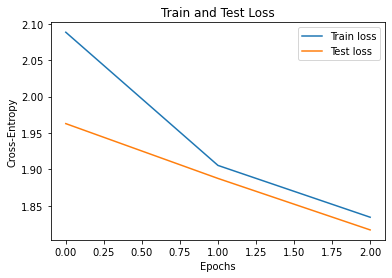

In [10]:
import matplotlib.pyplot as plt

# Plot history: Loss and accuracy
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()